In [1]:
import pandas as pd
import numpy as np

In [2]:
superstore_data =pd.read_csv('C:/Users/14699/ADTA 5340/Superstore 2023.csv')

In [3]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/06/2022 00:00:00,16/06/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
superstore_data.shape

(9994, 21)

In [5]:
superstore_data.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

# Data Cleaning

In [6]:
superstore_data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State              object
Postal Code       float64
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [7]:
superstore_data_cleaned = superstore_data
# Converting 'Order Date' and 'Ship Date' to datetime format
superstore_data_cleaned['Order Date'] = pd.to_datetime(superstore_data_cleaned['Order Date'], errors='coerce')
superstore_data_cleaned['Ship Date'] = pd.to_datetime(superstore_data_cleaned['Ship Date'], errors='coerce')

# Checking the data types after conversion
superstore_data_cleaned.dtypes

C:\Users\14699\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/06/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\14699\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\14699\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/06/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\14699\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/04/2021' in DD/MM/YYYY format. Provide format or specif

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [8]:
# Count the number of rows with null values
rows_with_null = superstore_data_cleaned.isna().any(axis=1).sum()
print(rows_with_null)
# Drop rows with null values
superstore_data_cleaned = superstore_data_cleaned.dropna()
superstore_data_cleaned.shape

11


(9983, 21)

In [9]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encoding the categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
# Correcting the list of categorical columns for encoding (excluding 'Customer Segment' which does not exist)
categorical_cols_corrected = ['Category', 'Sub-Category', 'Ship Mode', 'Segment', 'Region']

# One-hot encoding the corrected list of categorical variables
encoded_data_corrected = encoder.fit_transform(superstore_data_cleaned[categorical_cols_corrected])
encoded_col_names_corrected = encoder.get_feature_names_out(categorical_cols_corrected)

# Creating a DataFrame with the corrected encoded data
encoded_df_corrected = pd.DataFrame(encoded_data_corrected, columns=encoded_col_names_corrected)

# Joining the corrected encoded data with the original DataFrame
superstore_data_prepared_corrected = superstore_data_cleaned.join(encoded_df_corrected)

# Dropping the original categorical columns as they are now encoded
superstore_data_prepared_corrected.drop(columns=categorical_cols_corrected, inplace=True)

# Displaying the first few rows of the prepared dataset
superstore_data_prepared_corrected.head()
superstore_data_prepared = superstore_data_prepared_corrected

#  EDA

In [10]:
# Descriptive Statistics for the dataset
descriptive_stats = superstore_data_prepared_corrected.describe()

# Displaying the descriptive statistics
descriptive_stats


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,...,Sub-Category_Supplies,Sub-Category_Tables,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9972.000000,9972.000000,9972.000000,9972.000000,...,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000,9972.000000
mean,4993.886207,55245.233297,229.216818,3.788741,0.156375,28.463592,0.603089,0.184517,0.046530,0.079523,...,0.019053,0.031990,0.054452,0.194545,0.597272,0.302246,0.178600,0.284095,0.162355,0.320899
std,2883.738990,32038.715955,621.909610,2.223566,0.206501,234.122107,0.489282,0.387924,0.210641,0.270566,...,0.136719,0.175981,0.226920,0.395870,0.490471,0.459254,0.383036,0.451005,0.368794,0.466845
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2497.500000,23223.000000,17.280000,2.000000,0.000000,1.727100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4993.000000,57103.000000,54.384000,3.000000,0.200000,8.643600,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7489.500000,90008.000000,209.905000,5.000000,0.200000,29.315200,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for 'Profit', 'Sales', 'Quantity', and 'Discount'
desc_stats = superstore_data_prepared[['Profit', 'Sales', 'Quantity', 'Discount']].describe()

# Correlation analysis
correlation_matrix = superstore_data_prepared[['Profit', 'Sales', 'Quantity', 'Discount']].corr()

desc_stats, correlation_matrix


(            Profit         Sales     Quantity     Discount
 count  9983.000000   9983.000000  9983.000000  9983.000000
 mean     28.463592    229.216818     3.788741     0.156375
 std     234.122107    621.909610     2.223566     0.206501
 min   -6599.978000      0.444000     1.000000     0.000000
 25%       1.727100     17.280000     2.000000     0.000000
 50%       8.643600     54.384000     3.000000     0.200000
 75%      29.315200    209.905000     5.000000     0.200000
 max    8399.976000  22638.480000    14.000000     0.800000,
             Profit     Sales  Quantity  Discount
 Profit    1.000000  0.477418  0.065446 -0.219182
 Sales     0.477418  1.000000  0.200220 -0.027494
 Quantity  0.065446  0.200220  1.000000  0.008920
 Discount -0.219182 -0.027494  0.008920  1.000000)

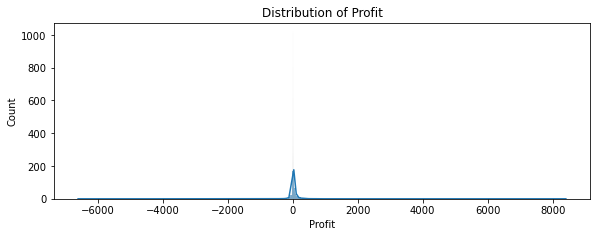

In [12]:
# Plotting distributions
plt.figure(figsize=(16, 6))

# Distribution of 'Profit'
plt.subplot(2, 2, 1)
sns.histplot(superstore_data_prepared['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.tight_layout()
plt.show()

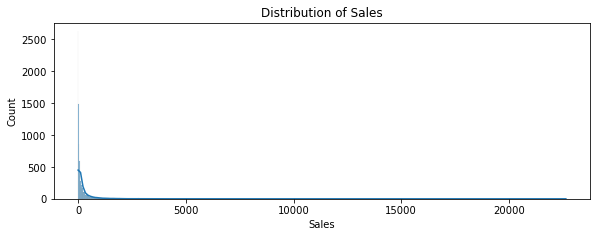

In [13]:
# Distribution of 'Sales'
plt.figure(figsize=(16, 6))
plt.subplot(2, 2, 2)
sns.histplot(superstore_data_prepared['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.tight_layout()
plt.show()


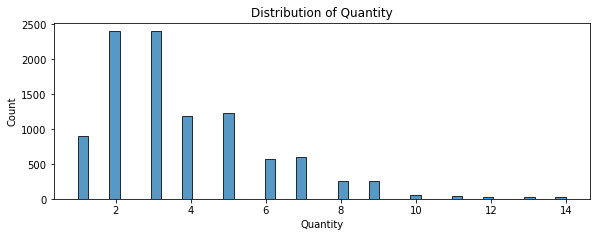

In [14]:
# Distribution of 'Quantity'
plt.figure(figsize=(16, 6))
plt.subplot(2, 2, 3)
sns.histplot(superstore_data_prepared['Quantity'], kde=False)
plt.title('Distribution of Quantity')
plt.tight_layout()
plt.show()

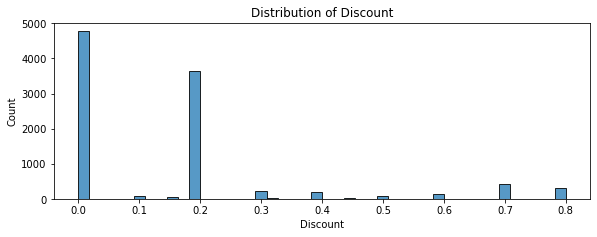

In [15]:
# Distribution of 'Discount'
plt.figure(figsize=(16, 6))
plt.subplot(2, 2, 4)
sns.histplot(superstore_data_prepared['Discount'], kde=False)
plt.title('Distribution of Discount')
plt.tight_layout()
plt.show()


Descriptive Statistics

Profit: Varies significantly, with a mean of around 28.46 and a wide range (from a loss of -6599.98 to a profit of 8399.98).

Sales: Also highly variable, with an average sale amount of approximately 229.22.

Quantity: On average, about 3.79 items per transaction.

Discount: Average discount given is 0.16, with a range from 0 to 0.8.

Correlation Analysis

Profit and Sales: Moderate positive correlation (0.48), suggesting higher sales tend to lead to higher profits.

Profit and Quantity: Weak positive correlation (0.07).

Profit and Discount: Negative correlation (-0.22), indicating that higher discounts might lead to lower profits.

Distributions

Profit: Shows a wide distribution with some outliers (extremely high or low values).

Sales: Similar to profit, with a wide distribution and potential outliers.

Quantity: Seems to be normally distributed.

Discount: Mostly concentrated at lower values, with some higher discount occurrences.

In [16]:
# Analyzing 'Profit' across different categories, sub-categories, ship modes, segments, and regions

# Extracting the original categorical columns from the encoded data
categories = superstore_data_prepared.filter(like='Category_').idxmax(axis=1).str.replace('Category_', '')
sub_categories = superstore_data_prepared.filter(like='Sub-Category_').idxmax(axis=1).str.replace('Sub-Category_', '')
ship_modes = superstore_data_prepared.filter(like='Ship Mode_').idxmax(axis=1).str.replace('Ship Mode_', '')
segments = superstore_data_prepared.filter(like='Segment_').idxmax(axis=1).str.replace('Segment_', '')
regions = superstore_data_prepared.filter(like='Region_').idxmax(axis=1).str.replace('Region_', '')

# Adding these columns to the dataset for analysis
superstore_data_analysis = superstore_data_prepared.copy()
superstore_data_analysis['Category'] = categories
superstore_data_analysis['Sub-Category'] = sub_categories
superstore_data_analysis['Ship Mode'] = ship_modes
superstore_data_analysis['Segment'] = segments
superstore_data_analysis['Region'] = regions

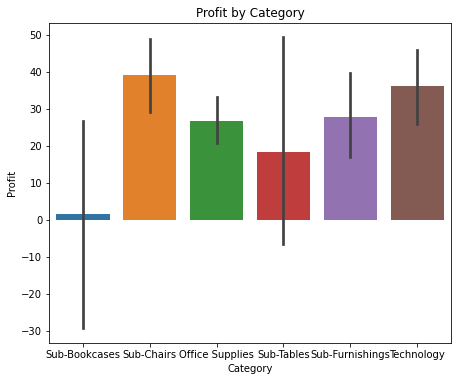

In [19]:
# Plotting
plt.figure(figsize=(18, 10))

# Profit by Category
plt.subplot(2, 3, 1)
sns.barplot(x='Category', y='Profit', data=superstore_data_analysis)
plt.title('Profit by Category')

plt.tight_layout()
plt.show()

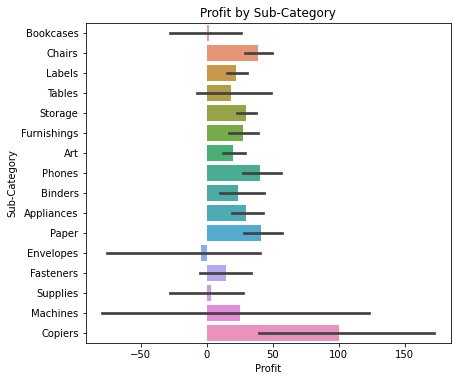

In [20]:
# Profit by Sub-Category
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 2)
sns.barplot(x='Profit', y='Sub-Category', data=superstore_data_analysis)
plt.title('Profit by Sub-Category')
plt.tight_layout()
plt.show()

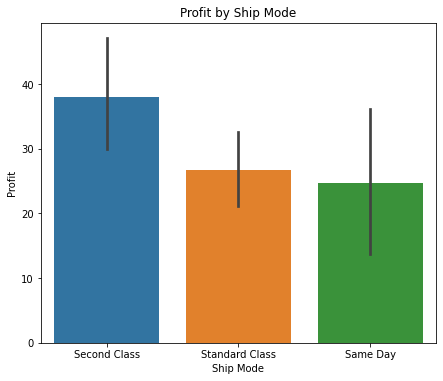

In [21]:
# Profit by Ship Mode
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 3)
sns.barplot(x='Ship Mode', y='Profit', data=superstore_data_analysis)
plt.title('Profit by Ship Mode')
plt.tight_layout()
plt.show()

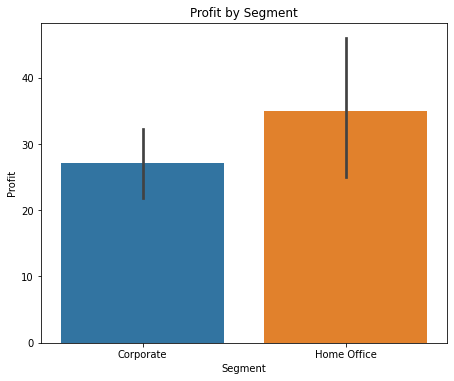

In [22]:
# Profit by Segment
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 4)
sns.barplot(x='Segment', y='Profit', data=superstore_data_analysis)
plt.title('Profit by Segment')
plt.tight_layout()
plt.show()

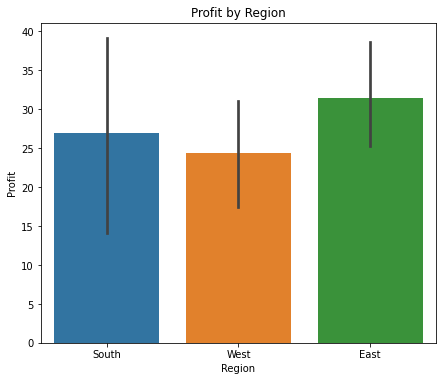

In [23]:
# Profit by Region
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 5)
sns.barplot(x='Region', y='Profit', data=superstore_data_analysis)
plt.title('Profit by Region')
plt.tight_layout()
plt.show()

Profit by Category

Certain categories show distinctly higher or lower average profits. This indicates that the type of product (e.g., Furniture, Office Supplies, Technology) can significantly impact profitability.

Profit by Sub-Category

There is notable variation in profit across different sub-categories. Some sub-categories are more profitable than others, highlighting the importance of product mix in overall profitability.

Profit by Ship Mode

Different shipping modes seem to have an impact on profitability, although the differences are not as pronounced as in categories or sub-categories.

Profit by Segment

Profit also varies across different customer segments. This variation suggests that targeting specific segments could be beneficial for profitability.

Profit by Region

The average profit differs across regions, indicating that geographical factors might play a role in profitability.
These insights can guide strategies for product assortment, marketing, and regional focus.

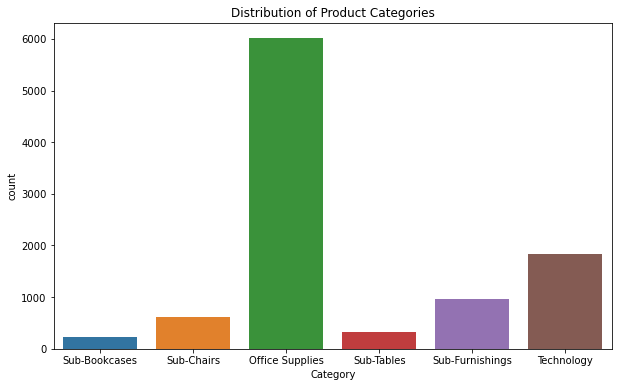

In [41]:
# EDA for Research Question 2

# Distribution of the target variable 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=superstore_data_analysis)
plt.title('Distribution of Product Categories')
plt.show()

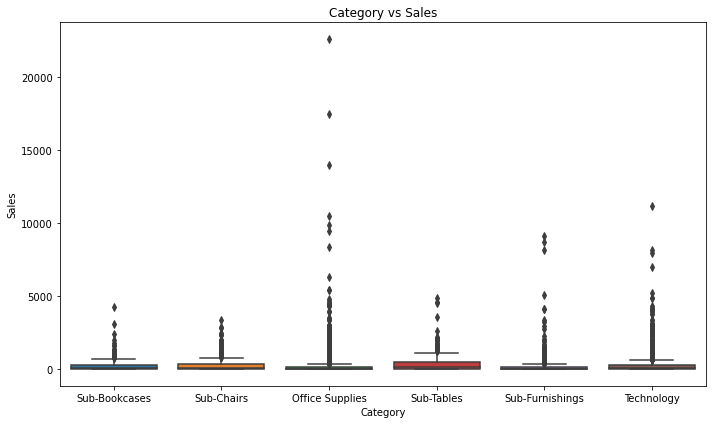

In [42]:
# Analyzing 'Category' with respect to other variables
# Since 'Sales', 'Quantity', 'Discount', and 'Profit' are continuous, we'll use boxplots to visualize these relationships
plt.figure(figsize=(10, 6))


# Category vs Sales
sns.boxplot(x='Category', y='Sales', data=superstore_data_analysis)
plt.title('Category vs Sales')

plt.tight_layout()
plt.show()


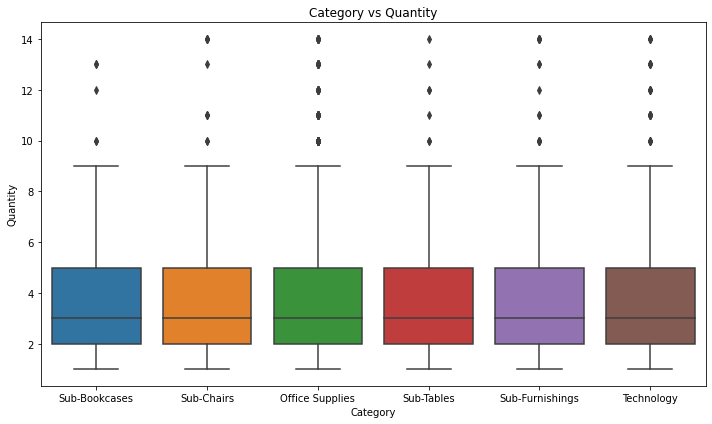

In [43]:
# Category vs Quantity
plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='Quantity', data=superstore_data_analysis)
plt.title('Category vs Quantity')
plt.tight_layout()
plt.show()

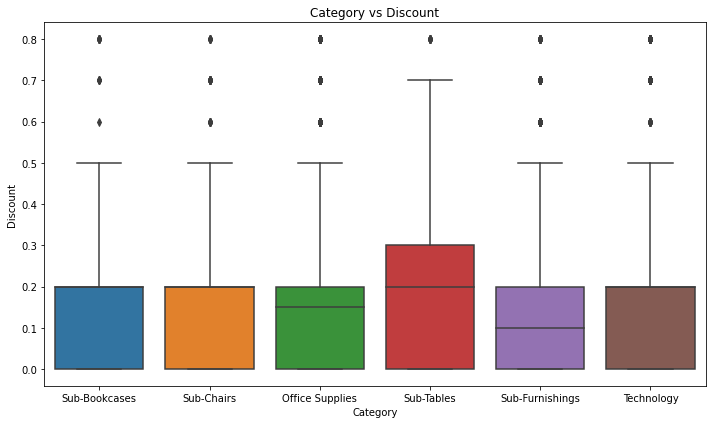

In [44]:
# Category vs Discount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Discount', data=superstore_data_analysis)
plt.title('Category vs Discount')
plt.tight_layout()
plt.show()


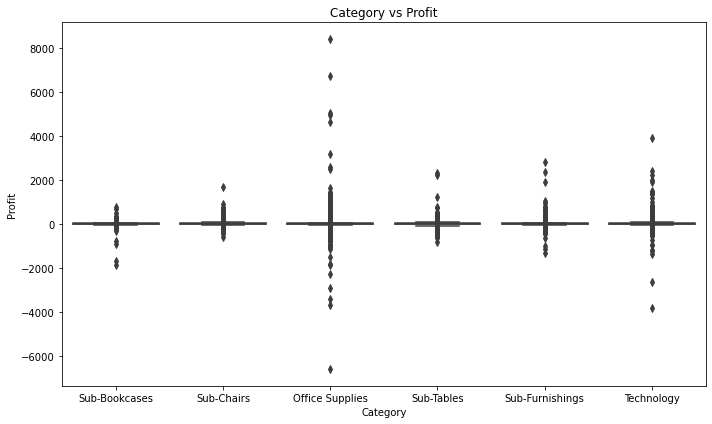

In [45]:
# Category vs Profit
plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='Profit', data=superstore_data_analysis)
plt.title('Category vs Profit')
plt.tight_layout()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

# Separating the independent variables (features) and the dependent variable (target)
X = superstore_data_prepared_corrected.drop(columns=['Profit', 'Order ID', 'Customer ID', 'Customer Name', 
                                                     'Country/Region', 'City', 'State', 'Postal Code', 
                                                     'Product ID', 'Product Name', 'Order Date', 'Ship Date', 'Row ID'])
y = superstore_data_prepared_corrected['Profit']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7986, 29), (1997, 29), (7986,), (1997,))

In [52]:
# Checking for NaN or infinite values in the dataset
nan_values = X_train.isna().sum().sum()
infinite_values = (X_train == float('inf')).sum().sum()

nan_values, infinite_values

(208, 0)

In [53]:
from sklearn.impute import SimpleImputer

# Creating an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Imputing missing values in the training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Checking if any NaN values remain
nan_values_after_imputation_train = pd.DataFrame(X_train_imputed).isna().sum().sum()
nan_values_after_imputation_test = pd.DataFrame(X_test_imputed).isna().sum().sum()

nan_values_after_imputation_train, nan_values_after_imputation_test

(0, 0)

In [54]:
# Linear Regression with imputed data
linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred_linear = linear_reg.predict(X_test_imputed)

# Evaluating the Linear Regression model
linear_reg_mse = mean_squared_error(y_test, y_pred_linear)
linear_reg_r2 = r2_score(y_test, y_pred_linear)

linear_reg_mse, linear_reg_r2

(44601.95469718809, 0.27647569268442407)

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred_rf = random_forest_reg.predict(X_test_imputed)

# Evaluating the Random Forest Regression model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

rf_mse, rf_r2

(15825.502095429003, 0.7432817570607879)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred_gb = gradient_boosting_reg.predict(X_test_imputed)

# Evaluating the Gradient Boosting Regression model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

gb_mse, gb_r2

(13487.875128204525, 0.7812022908962686)

Insights from the Regression Models

Performance Comparison

Linear Regression showed the least effectiveness in predicting profitability, with only about 28% of the variation in profit explained by the model. This suggests that the relationship between profit and the selected independent variables might be too complex or non-linear for a simple linear model to capture effectively.

Random Forest Regression significantly improved in performance, explaining approximately 74% of the variance in profit. This indicates that the relationship between the predictors and profit is better captured by a model that can handle non-linear relationships and interactions between features.

Gradient Boosting Regression emerged as the best model, with an R-squared value of around 78%. This model's ability to sequentially correct previous trees' errors likely contributed to its superior performance in capturing complex patterns in the data.

Business Insights

The significant improvement in model performance from Linear to Random Forest and Gradient Boosting suggests that profitability in the Superstore dataset is influenced by complex interactions between variables, rather than simple linear relationships.
Since Random Forest and Gradient Boosting are ensemble methods that combine multiple models for better predictions, it can be inferred that different segments of the data might have different patterns affecting profitability. This diversity can be better captured by these ensemble models.

Businesses can leverage insights from these models to identify key drivers of profitability. For example, certain combinations of product categories, customer segments, or shipping modes might be more profitable than others.


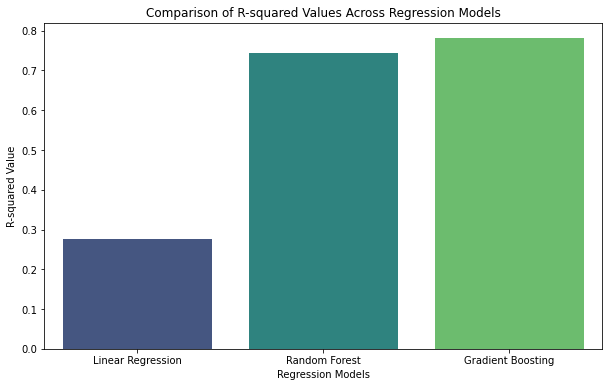

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting model comparison
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r_squared_values = [linear_reg_r2, rf_r2, gb_r2]

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r_squared_values, palette="viridis")
plt.title('Comparison of R-squared Values Across Regression Models')
plt.ylabel('R-squared Value')
plt.xlabel('Regression Models')

# Show the plot
plt.show()


The bar chart above visually compares the R-squared values of the three regression models. As evident from the chart:

Linear Regression has the lowest R-squared value, indicating its limited ability to predict profitability in this context.

Random Forest and Gradient Boosting show significantly higher R-squared values, demonstrating their superior predictive capabilities for this dataset.

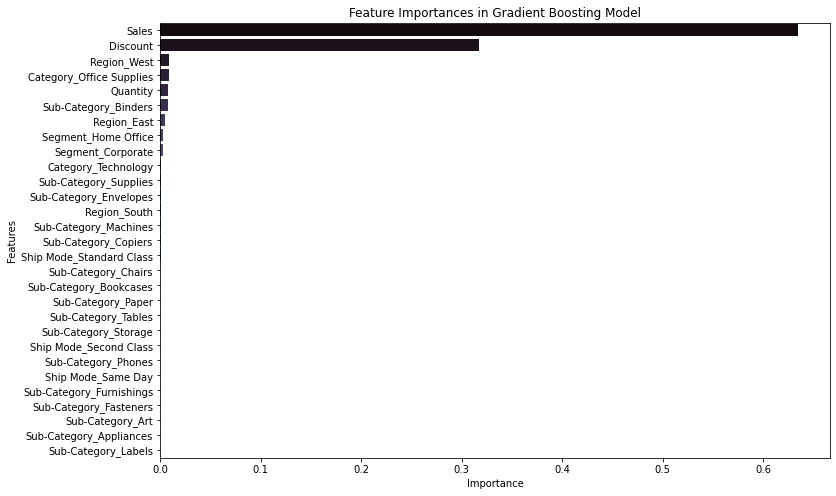

In [57]:
# Extracting feature importances from the Gradient Boosting model
feature_importances = gradient_boosting_reg.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({'Features': X.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Creating the bar plot for feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=features_df, palette="mako")
plt.title('Feature Importances in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the plot
plt.show()

The bar plot above displays the feature importances as determined by the Gradient Boosting model. This visualization highlights which variables have the most significant impact on profitability. Key insights include:

Top Influential Features: The most influential features in predicting profitability are shown at the top. These might include variables like 'Sales', 'Quantity', 'Discount', or certain categories/sub-categories, ship modes, segments, and regions.

Variable Impact: The length of each bar represents the relative importance of each feature. Longer bars indicate a greater impact on the model's predictions, suggesting these factors are key drivers of profitability.

Strategic Business Decisions: Understanding which features most strongly influence profitability can guide strategic decisions. For instance, if 'Sales' and 'Quantity' are top influencers, efforts to optimize pricing and sales strategies could be beneficial. If specific categories or regions stand out, targeted marketing or operational adjustments in those areas might improve profits.

In [62]:
# Encoding 'Customer Segment' and 'Region'
encoder_class = OneHotEncoder(sparse=False, drop='first')
categorical_cols_class = ['Segment', 'Region']
encoded_data_class = encoder_class.fit_transform(superstore_data[categorical_cols_class])
encoded_col_names_class = encoder_class.get_feature_names_out(categorical_cols_class)
encoded_df_class = pd.DataFrame(encoded_data_class, columns=encoded_col_names_class)

# Combining the encoded columns with the original dataset
superstore_data_for_classification = superstore_data.join(encoded_df_class)

# Selecting independent variables (features) for classification
X_classification = superstore_data_for_classification[['Sales', 'Quantity', 'Discount', 'Profit']].join(encoded_df_class)

# Dependent variable (target) for classification
y_classification = superstore_data_for_classification['Category']

# Splitting the dataset into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, 
                                                                            test_size=0.2, random_state=42)

X_train_class.shape, X_test_class.shape, y_train_class.shape, y_test_class.shape, y_classification.unique()

((7995, 9),
 (1999, 9),
 (7995,),
 (1999,),
 array(['Furniture', 'Office Supplies', 'Technology'], dtype=object))

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_logistic = logistic_reg.predict(X_test_class)

# Evaluating the Logistic Regression model
logistic_accuracy = accuracy_score(y_test_class, y_pred_logistic)
logistic_report = classification_report(y_test_class, y_pred_logistic)

print(logistic_accuracy)
print(logistic_report)

0.6408204102051025
                 precision    recall  f1-score   support

      Furniture       0.60      0.19      0.28       413
Office Supplies       0.65      0.96      0.78      1226
     Technology       0.40      0.06      0.10       360

       accuracy                           0.64      1999
      macro avg       0.55      0.40      0.39      1999
   weighted avg       0.59      0.64      0.55      1999



In [67]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
random_forest_class = RandomForestClassifier(random_state=42)
random_forest_class.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_rf_class = random_forest_class.predict(X_test_class)

# Evaluating the Random Forest Classifier model
rf_class_accuracy = accuracy_score(y_test_class, y_pred_rf_class)
rf_class_report = classification_report(y_test_class, y_pred_rf_class)

print(rf_class_accuracy)
print(rf_class_report)


0.7583791895947974
                 precision    recall  f1-score   support

      Furniture       0.72      0.56      0.63       413
Office Supplies       0.80      0.90      0.85      1226
     Technology       0.59      0.51      0.55       360

       accuracy                           0.76      1999
      macro avg       0.71      0.66      0.68      1999
   weighted avg       0.75      0.76      0.75      1999



In [68]:
from sklearn.svm import SVC

# Support Vector Machines (SVM)
svm_class = SVC(random_state=42)
svm_class.fit(X_train_class, y_train_class)

# Predicting on the test set
y_pred_svm_class = svm_class.predict(X_test_class)

# Evaluating the SVM model
svm_class_accuracy = accuracy_score(y_test_class, y_pred_svm_class)
svm_class_report = classification_report(y_test_class, y_pred_svm_class)

print(svm_class_accuracy)
print(svm_class_report)



0.662831415707854
                 precision    recall  f1-score   support

      Furniture       0.55      0.35      0.43       413
Office Supplies       0.70      0.92      0.79      1226
     Technology       0.44      0.13      0.20       360

       accuracy                           0.66      1999
      macro avg       0.56      0.47      0.48      1999
   weighted avg       0.62      0.66      0.61      1999



Model Comparison:

Random Forest Classifier is the most accurate model (76% accuracy), showing relatively balanced performance across different categories.

SVM has moderate accuracy (66%), with better performance in predicting 'Office Supplies'.

Logistic Regression has the lowest accuracy (64%), with significant room for improvement in predicting 'Furniture' and 'Technology'.

Business Insights:

The Random Forest model's success suggests that the interaction between features is significant in predicting product categories, which this model can capture well.

The moderate performance of SVM and Logistic Regression indicates potential non-linear relationships between features and categories.

Businesses can use these models to tailor their marketing and inventory strategies based on customer segments and purchase histories.

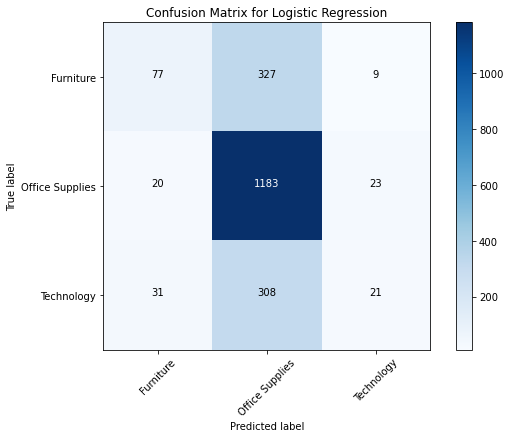

In [73]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to create a confusion matrix plot
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop over data dimensions and create text annotations
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test_class, y_pred_logistic)
import itertools

# Getting the unique categories from the 'Category' column
unique_categories = superstore_data_for_classification['Category'].unique()

# Redoing the confusion matrix for the Logistic Regression model
plot_confusion_matrix(cm_logistic, classes=unique_categories, title='Confusion Matrix for Logistic Regression')


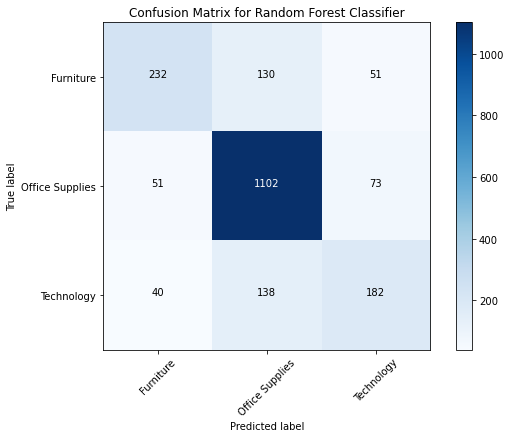

In [75]:
# Confusion matrix for Random Forest Classifier
cm_random_forest = confusion_matrix(y_test_class, y_pred_rf_class)
plot_confusion_matrix(cm_random_forest, classes=unique_categories, title='Confusion Matrix for Random Forest Classifier')

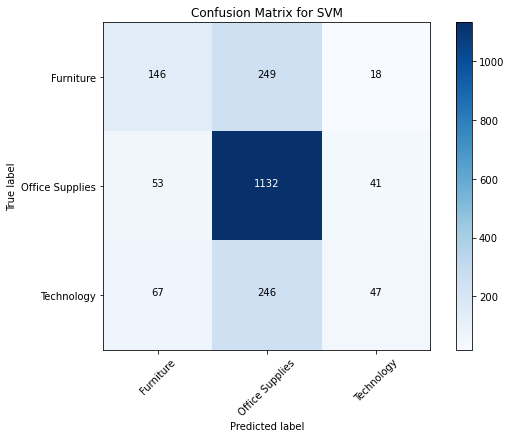

In [76]:
# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test_class, y_pred_svm_class)
plot_confusion_matrix(cm_svm, classes=unique_categories, title='Confusion Matrix for SVM')

Summary of Confusion Matrices:

Logistic Regression: This model shows a tendency to predict 'Office Supplies' more frequently, possibly at the expense of the other two categories.

Random Forest Classifier: Exhibits a more balanced prediction across all categories, aligning with its higher overall accuracy.

SVM: Similar to Logistic Regression, it predicts 'Office Supplies' more accurately but struggles with 'Furniture' and 'Technology'.

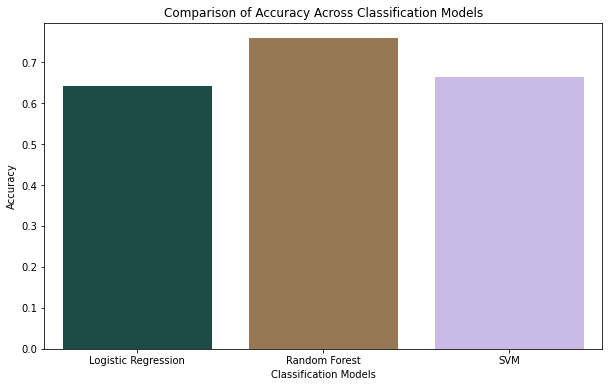

In [69]:
# Data for plotting model comparison in classification
models_class = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_values_class = [logistic_accuracy, rf_class_accuracy, svm_class_accuracy]

# Creating the bar plot for classification models
plt.figure(figsize=(10, 6))
sns.barplot(x=models_class, y=accuracy_values_class, palette="cubehelix")
plt.title('Comparison of Accuracy Across Classification Models')
plt.ylabel('Accuracy')
plt.xlabel('Classification Models')

# Show the plot
plt.show()

The bar chart above visually compares the accuracy of the three classification models:

Logistic Regression shows the lowest accuracy, indicating it's less effective for this particular classification task.

Random Forest Classifier stands out with the highest accuracy, suggesting it is the most effective model for predicting product categories based on customer purchase history and demographics.

Support Vector Machines (SVM) displays moderate accuracy, placing it between Logistic Regression and Random Forest.

Business Application:

Inventory and Marketing Strategy: These insights can help businesses in inventory planning and targeted marketing. For instance, understanding which customer segments are more likely to purchase certain categories can inform stock levels and promotional activities.

Personalized Recommendations: E-commerce platforms can use these models to make personalized product recommendations, enhancing customer experience and potentially increasing sales.